In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb
import cv2
import tensorflow as tf
import keras
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
import io
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.metrics import accuracy_score
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
trainpath = '../input/' 
# /kaggle/input/dataset

In [4]:
for folder in  os.listdir(trainpath + 'dataset') : 
    files = gb.glob(pathname= str( trainpath +'dataset//' + folder + '/*.jpg'))
    print(f'For  data , found {len(files)} in folder {folder}')

For  data , found 859 in folder Normal Person ECG Images (859)
For  data , found 74 in folder ECG Images of Myocardial Infarction Patients (77)
For  data , found 546 in folder ECG Images of Patient that have abnormal heart beats (548)
For  data , found 250 in folder ECG Images of COVID-19 Patients (250)
For  data , found 203 in folder ECG Images of Patient that have History of MI (203)


In [5]:
code = {'Normal Person ECG Images (859)':0 ,'ECG Images of COVID-19 Patients (250)':1,'ECG Images of Patient that have History of MI (203)':2,'ECG Images of Myocardial Infarction Patients (77)':3,'ECG Images of Patient that have abnormal heart beats (548)':4}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    


In [6]:
size = []
for folder in  os.listdir(trainpath +'dataset') : 
    files = gb.glob(pathname= str( trainpath +'dataset//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(1572, 2213, 3)    1694
(1232, 952, 3)       73
(1243, 961, 3)       11
(944, 1221, 3)        9
(918, 1188, 3)        9
(935, 1210, 3)        8
(927, 1199, 3)        8
(1080, 1397, 3)       7
(1012, 1309, 3)       7
(1046, 1353, 3)       7
(1003, 1298, 3)       7
(1020, 1320, 3)       6
(1071, 1386, 3)       6
(952, 1232, 3)        6
(1054, 1364, 3)       5
(910, 1177, 3)        5
(961, 1243, 3)        4
(1037, 1342, 3)       4
(978, 1265, 3)        4
(1063, 1375, 3)       4
(1221, 944, 3)        4
(995, 1287, 3)        4
(1148, 1485, 3)       3
(969, 1254, 3)        3
(893, 1155, 3)        3
(1105, 1430, 3)       2
(987, 1276, 3)        2
(1122, 1452, 3)       2
(876, 1133, 3)        2
(859, 1111, 3)        2
(1182, 1529, 3)       2
(1133, 876, 3)        1
(1156, 1496, 3)       1
(1114, 1441, 3)       1
(1309, 1694, 3)       1
(935, 1199, 3)        1
(1224, 1584, 3)       1
(901, 1155, 3)        1
(1131, 1463, 3)       1
(927, 1188, 3)        1
(1097, 1408, 3)       1
(1097, 1419, 3) 

In [7]:
s = 150


In [8]:
X = []
y = []
for folder in  os.listdir(trainpath +'dataset') : 
    files = gb.glob(pathname= str( trainpath +'dataset//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        y.append(code[folder])

In [9]:
print(f'we have {len(X)} items in X_train')
print(f'we have {len(y)} items in y_train')

we have 1932 items in X_train
we have 1932 items in y_train


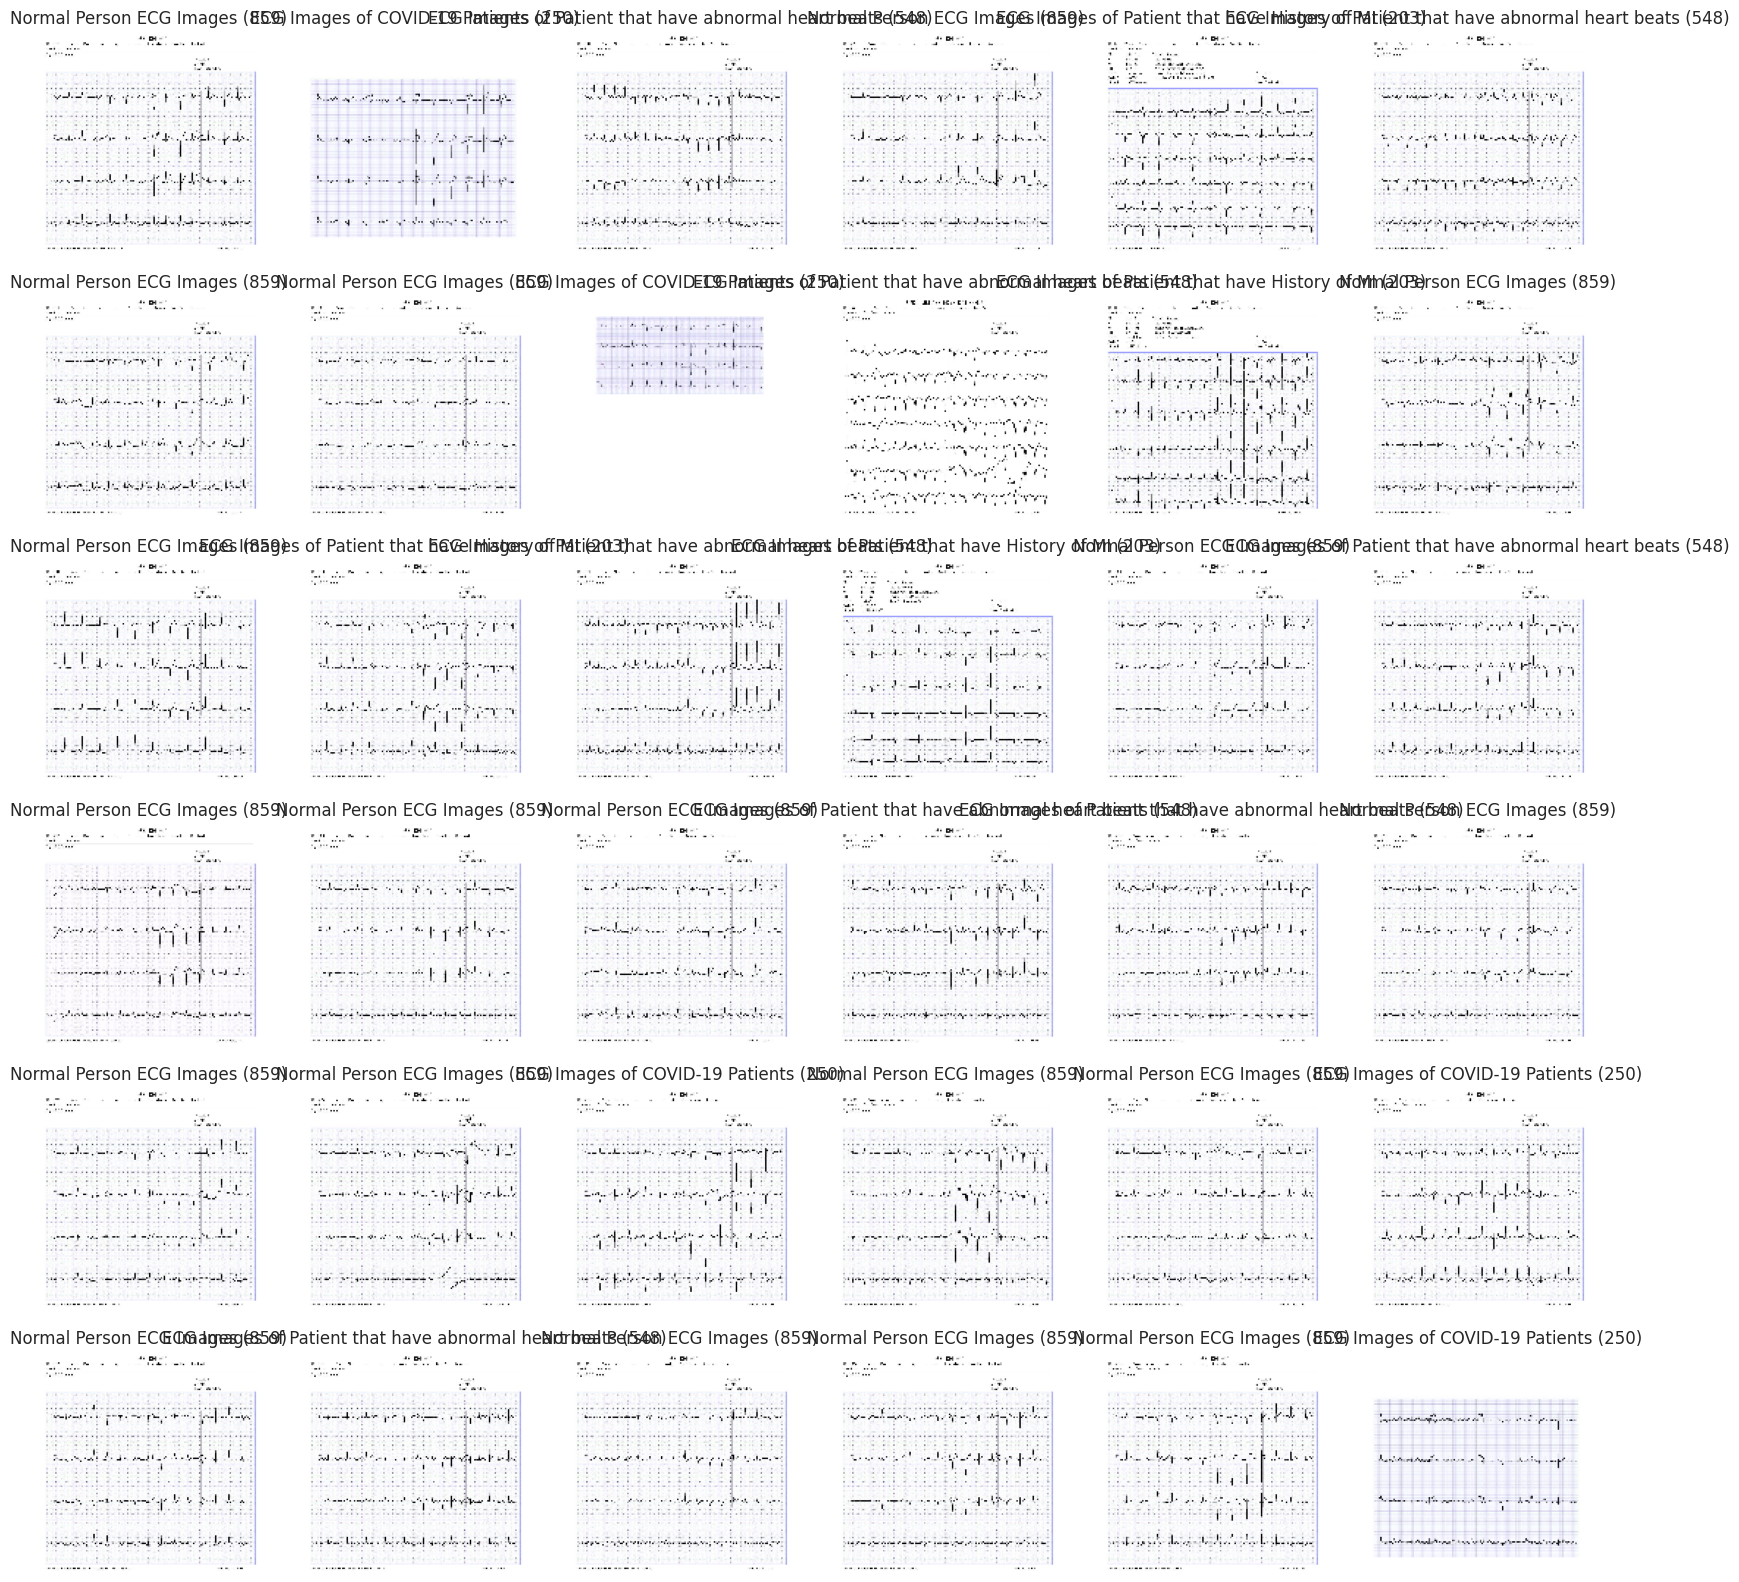

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(getcode(y[i]))

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=13)


In [12]:
# Encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (1738, 150, 150, 3)
X_test shape  is (194, 150, 150, 3)
y_train shape  is (1738, 5)
y_test shape  is (194, 5)


In [14]:
model = Sequential()

model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(s,s,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(24,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))


model.add(Dense(5,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/10


2023-05-05 07:34:28.277343: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


49/49 [==============================] - 14s 70ms/step - loss: 1.6928 - accuracy: 0.6119 - val_loss: 59.7346 - val_accuracy: 0.0402
Epoch 2/10
49/49 [==============================] - 3s 54ms/step - loss: 0.8075 - accuracy: 0.6937 - val_loss: 34.3218 - val_accuracy: 0.2931
Epoch 3/10
49/49 [==============================] - 3s 53ms/step - loss: 0.7325 - accuracy: 0.7225 - val_loss: 9.7993 - val_accuracy: 0.2989
Epoch 4/10
49/49 [==============================] - 3s 54ms/step - loss: 0.6510 - accuracy: 0.7564 - val_loss: 13.4571 - val_accuracy: 0.2931
Epoch 5/10
49/49 [==============================] - 3s 54ms/step - loss: 0.6388 - accuracy: 0.7666 - val_loss: 16.5860 - val_accuracy: 0.2931
Epoch 6/10
49/49 [==============================] - 3s 57ms/step - loss: 0.5766 - accuracy: 0.7858 - val_loss: 8.2692 - val_accuracy: 0.2931
Epoch 7/10
49/49 [==============================] - 3s 54ms/step - loss: 0.5345 - accuracy: 0.8069 - val_loss: 3.5029 - val_accuracy: 0.2816
Epoch 8/10
49/49 [=

In [18]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

7/7 [==============================] - 0s 16ms/step - loss: 1.1437 - accuracy: 0.6701
Test Loss is 1.1437402963638306
Test Accuracy is 0.6701030731201172


KeyError: 'acc'

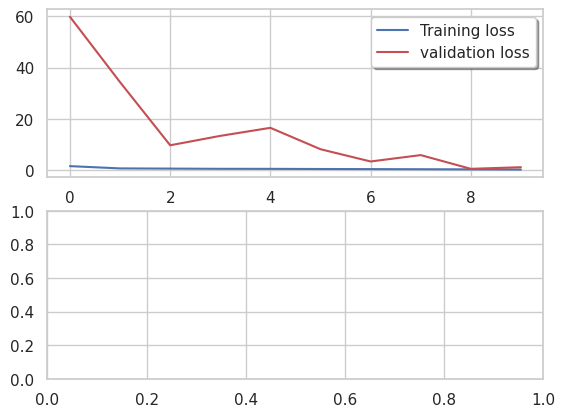

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
mport matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

SyntaxError: invalid syntax (2145668564.py, line 1)

In [21]:
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [22]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

NameError: name 'y_true' is not defined

In [23]:
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

NameError: name 'correct' is not defined

In [24]:
for i, incorrect in enumerate(incorrect[0:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

NameError: name 'incorrect' is not defined